#  $$\textbf{Set Up}$$

## Packages

In [1]:
import cv2
from matplotlib import pyplot as plt
import wget
from zipfile import ZipFile
import os 
from pathlib import Path
import numpy as np
import pandas as pd
import glob

## Global Variables:

In [2]:
DataFolder="./Data/UE03"
URL_IMGAE="https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
PathData=Path(DataFolder)/"GTSRB/Final_Training/Images"
OUT_DIR=DataFolder+'/RESIZED'

## Functions:

#  $$\textbf{Datenexploration}$$

## Download Data

In [3]:
## Create Folder to store the data 
if(os.path.isdir(DataFolder)!=True):
    os.mkdir(DataFolder)
    
##  Download imgae data
if(os.path.isdir(PathData)!=True):
    zipped_file=wget.download(URL_IMGAE,out=DataFolder)
    ZipFile(zipped_file).extractall(DataFolder)
    print('\nData file has been downloaded und unzipped')


## Read Data

In [4]:
def read_mapping_files(rootpath):
    '''
    a function to read all csv file in subdirectory for every  traffic sign class
    Args:
        rootpath: path to the traffic sign data, for example './GTSRB/Final_Training/Images'
    return: 
        mapping_dict:
    '''
    mapping_dict=dict()
    for c in range(43):
        csv_file=rootpath+'/{:05d}/GT-{:05d}.csv'.format(c,c)
        df=pd.read_csv(csv_file,sep=';')
        mapping_dict[c]=df
    return mapping_dict
        
        

In [5]:
m_dict=read_mapping_files(str(PathData))

In [6]:
m_dict

{0:             Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
 0    00000_00000.ppm     29      30       5       6      24      25        0
 1    00000_00001.ppm     30      30       5       5      25      25        0
 2    00000_00002.ppm     30      30       5       5      25      25        0
 3    00000_00003.ppm     31      31       5       5      26      26        0
 4    00000_00004.ppm     30      32       5       6      25      26        0
 ..               ...    ...     ...     ...     ...     ...     ...      ...
 205  00006_00025.ppm     85      87       8       7      77      80        0
 206  00006_00026.ppm     92      95       8       8      83      87        0
 207  00006_00027.ppm     97     100       9       8      89      92        0
 208  00006_00028.ppm    105     109       9      10      95     100        0
 209  00006_00029.ppm    112     118      10      11     103     108        0
 
 [210 rows x 8 columns],
 1:              Filename  Width  

## Count of Image for every class

In [7]:
ClassIDs,ClassCounts=m_dict.keys(),[len(d.index) for d in m_dict.values()]

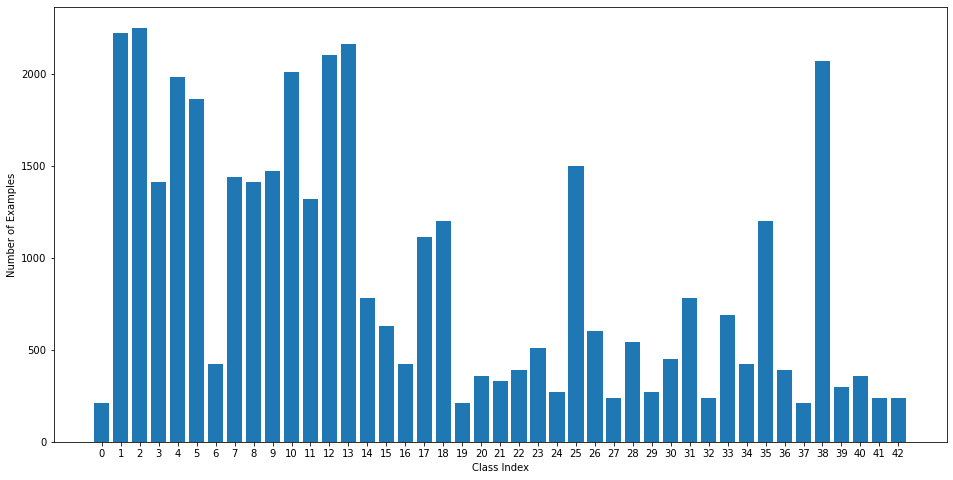

In [8]:
plt.figure(figsize=(16,8))
plt.bar(x=ClassIDs,height=ClassCounts)
plt.xticks(list(ClassIDs))
plt.ylabel('Number of Examples')
plt.xlabel('Class Index')
plt.show()

## Show a example for every class

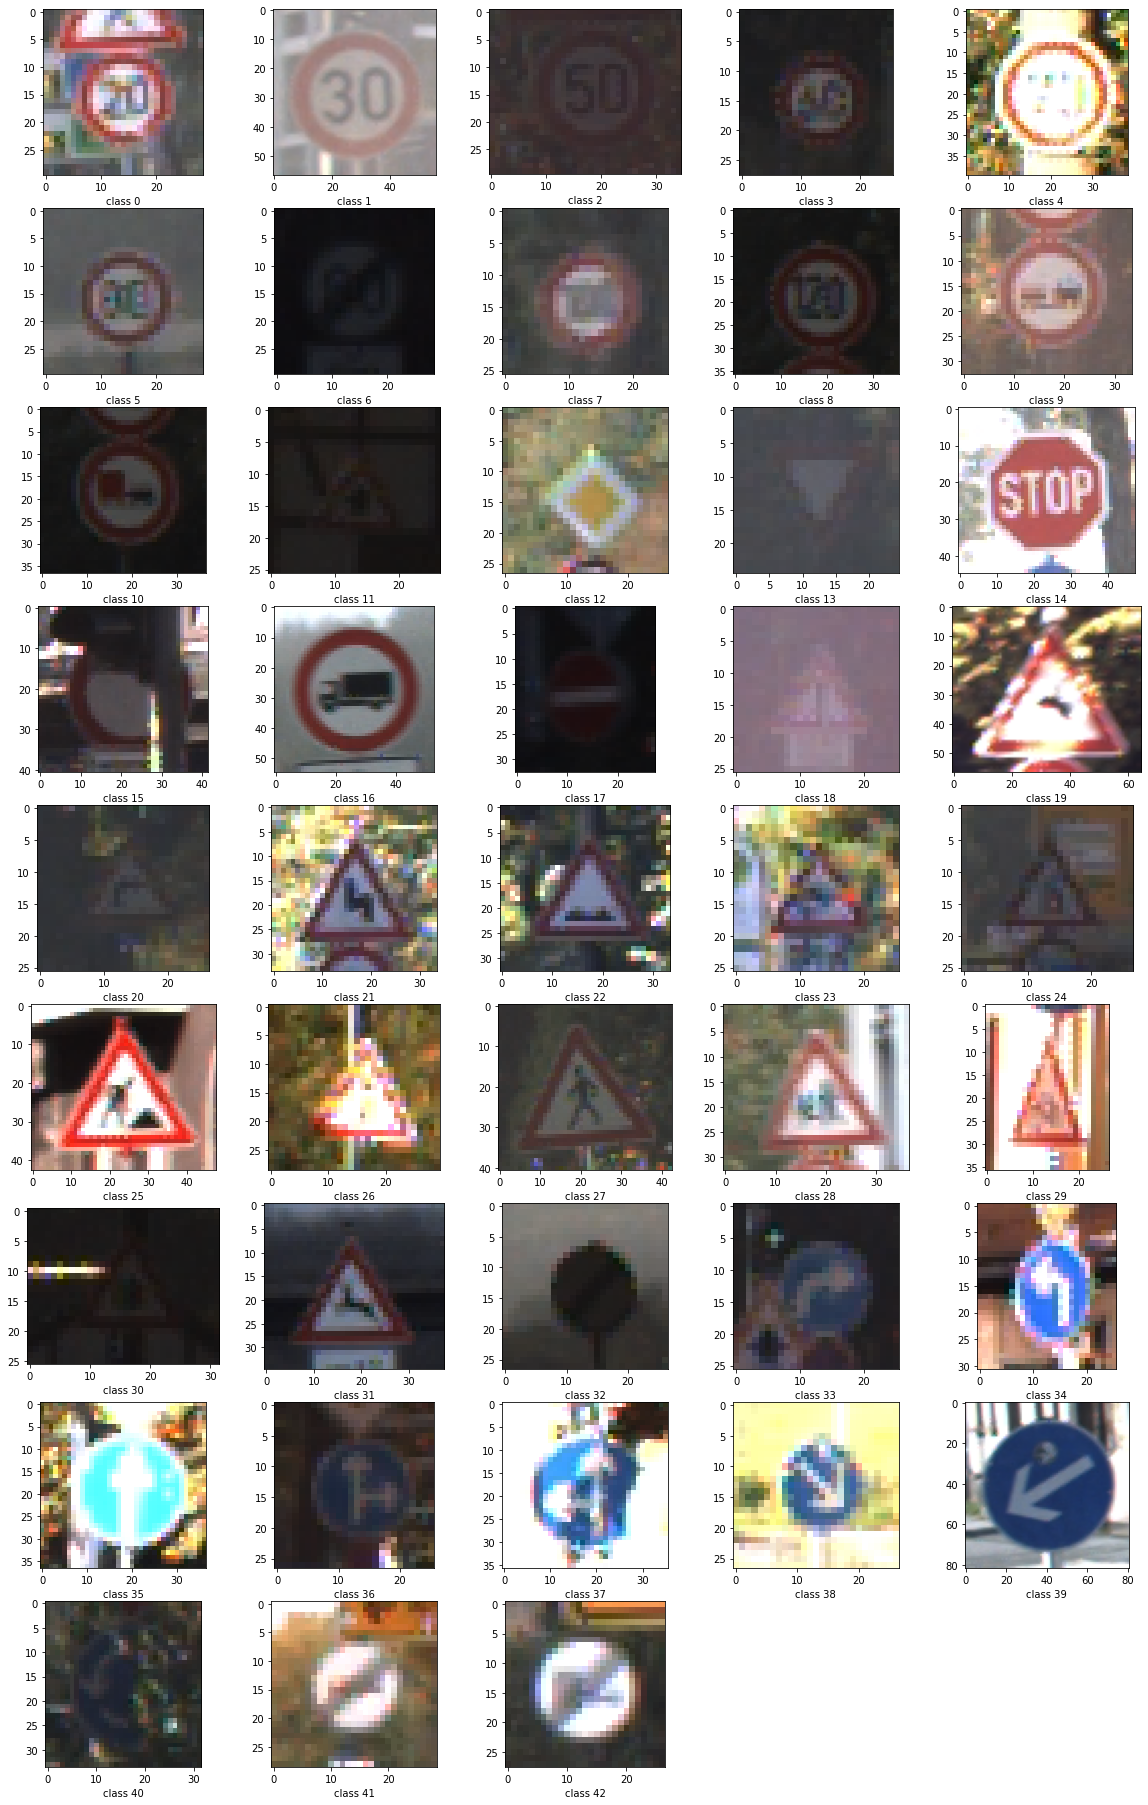

In [9]:
fig=plt.figure(figsize=(20,36))
for c in range(43):
    ax=fig.add_subplot(10,5,c+1)
    example=str(PathData)+"/{:05d}/".format(c)+m_dict[c]['Filename'][0]
    im=plt.imread(example)
    ax.imshow(im)
    ax.set_xlabel('class {:d}'.format(c))
plt.show()
    


#  $$\textbf{Vorverarbeitung}$$

## Rescaling



In [12]:
def resizing_all(in_dir,out_dir,w,h):
    '''
    Resize images of alle class, and save the result to  separated folders
    '''
    # if output directory not exist,create a new directory 
    if(os.path.isdir(out_dir)!=True):
        os.mkdir(out_dir)
    for c in range(43):
        # create subdirectory in output folder for each class
        subdir=out_dir+'/{:05d}'.format(c)
        if(os.path.isdir(subdir)!=True):
            os.mkdir(subdir)
        
        # read csv  from the source folder
        csv_file=in_dir+'/{:05d}/GT-{:05d}.csv'.format(c,c)
        df=pd.read_csv(csv_file,sep=';')
        
        # read all images that recorded in the csv file,and resize it
        for row in df.iloc[:,0]:
            path_img=in_dir+'/{:05d}/'.format(c)+row
            #print(path_img)
            img=cv2.imread(path_img)
            img=cv2.resize(img,(w,h))

            # save  resized images in subdirectory in output folder
            cv2.imwrite(subdir+'/'+row.replace('.ppm','.jpg'),img)
  

In [13]:
resizing_all(str(PathData),OUT_DIR,40,40)

## Grayscaling

for binary classification i choose class 12 and 25

In [16]:
dir_class12=OUT_DIR+'/00012'
imagepaths_class12=glob.glob(dir_class12+'/*.jpg')
gray_images_class12=[ cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2GRAY) for p in imagepaths_class12]

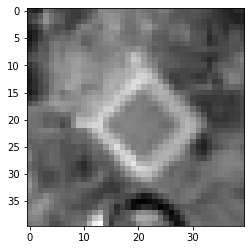

In [21]:
_=plt.imshow(gray_images_class12[2],cmap='gray')

In [22]:
dir_class25=OUT_DIR+'/00025'
imagepaths_class25=glob.glob(dir_class25+'/*.jpg')
gray_images_class25=[ cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2GRAY) for p in imagepaths_class25]

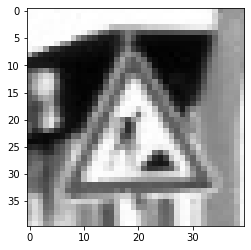

In [23]:
_=plt.imshow(gray_images_class25[2],cmap='gray')

#  $$\textbf{Merkmalsextraktion}$$

## HOG

## SIFT

## Haar

#  $$\textbf{PCA}$$

#  $$\textbf{Klassifikation}$$

#  $$\textbf{Evaluation}$$

In [86]:
def testfun(a,b,c):
    print(a,b,c,sep='\n')


In [87]:
d={'a':4,'b':7,'c':9}

In [88]:
testfun(**d)

4
7
9
